In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/mock_fish_catch_dataset_10000.csv')

# Date features
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday
df.drop(columns=['Date'], inplace=True)

# Encode categorical
for col in ['Tide', 'Moon_Phase', 'Fish_Species']:
    df[col] = LabelEncoder().fit_transform(df[col])

# Split
X = df.drop(columns=['Catch_kg'])
y = df['Catch_kg']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model
lr = LinearRegression()
lr.fit(x_train, y_train)



LinearRegression()

In [ ]:
# Predictions
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

# Print predictions
print("Train Predictions:\n", y_lr_train_pred)
print("Test Predictions:\n", y_lr_test_pred)


Train Predictions:
 [74.84039054 76.00461488 75.4231938  ... 76.47248111 81.26300611
 78.14616599]
Test Predictions:
 [76.61800561 73.35620836 78.92002428 ... 76.26065645 76.67966089
 74.67209811]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

# Metrics
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

# Output
print('LR MSE (Train):', lr_train_mse)
print('LR R2 (Train):', lr_train_r2)
print('LR MSE (Test):', lr_test_mse)
print('LR R2 (Test):', lr_test_r2)


LR MSE (Train): 1778.4263868053658
LR R2 (Train): 0.0018220378655983138
LR MSE (Test): 1677.7057685536124
LR R2 (Test): -0.002001284852287233


In [ ]:
import pandas as pd

lr_result = pd.DataFrame([[
    'Linear Regression',
    lr_train_mse,
    lr_train_r2,
    lr_test_mse,
    lr_test_r2
]], columns=[
    'Model', 'Train MSE', 'Train R²', 'Test MSE', 'Test R²'
])

print(lr_result)


               Model    Train MSE  Train R²     Test MSE   Test R²
0  Linear Regression  1778.426387  0.001822  1677.705769 -0.002001


In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load example dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

# Predictions
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

# Evaluation
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

# Display results
rf_result = pd.DataFrame([['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]],
                         columns=['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2'])
print(rf_result)


          Method  Training MSE  Training R2     Test MSE   Test R2
0  Random Forest   3008.084205     0.504956  2912.843967  0.450215


In [ ]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression model
lr = LinearRegression()
lr.fit(x_train, y_train)

# Predictions
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

# Evaluation
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

# Results DataFrame
lr_result = pd.DataFrame([['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]],
                         columns=['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2'])


In [ ]:
df_models = pd.concat([lr_result, rf_result], axis=0)
df_models.reset_index(drop=True, inplace=True)
print(df_models)


              Method  Training MSE  Training R2     Test MSE   Test R2
0  Linear Regression   2868.549703     0.527919  2900.193628  0.452603
1      Random Forest   3008.084205     0.504956  2912.843967  0.450215


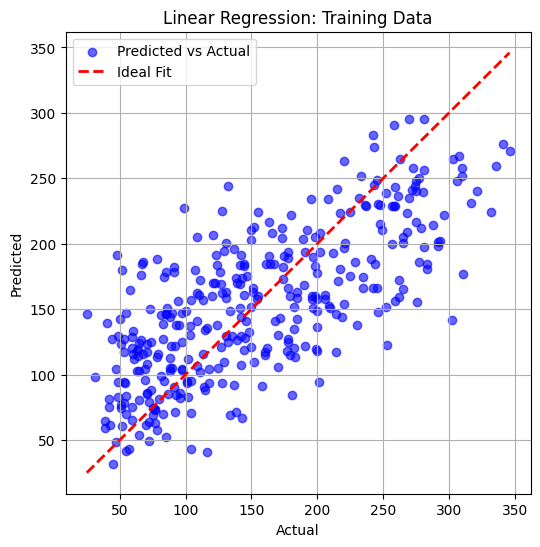

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_lr_train_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Training Data")
plt.legend()
plt.grid(True)
plt.show()


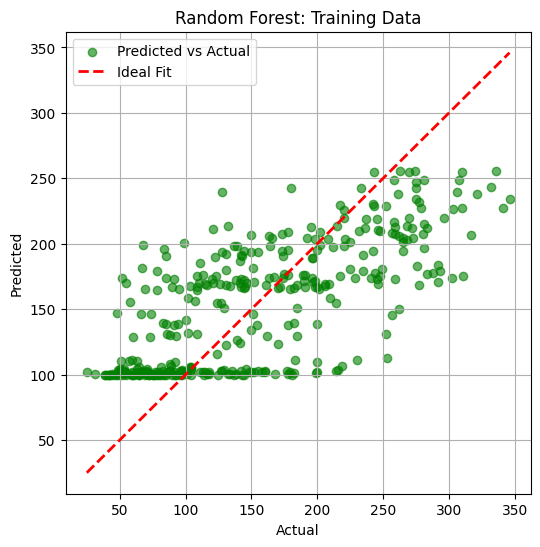

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_rf_train_pred, alpha=0.6, color='green', label='Predicted vs Actual')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest: Training Data")
plt.legend()
plt.grid(True)
plt.show()


###feature Importance

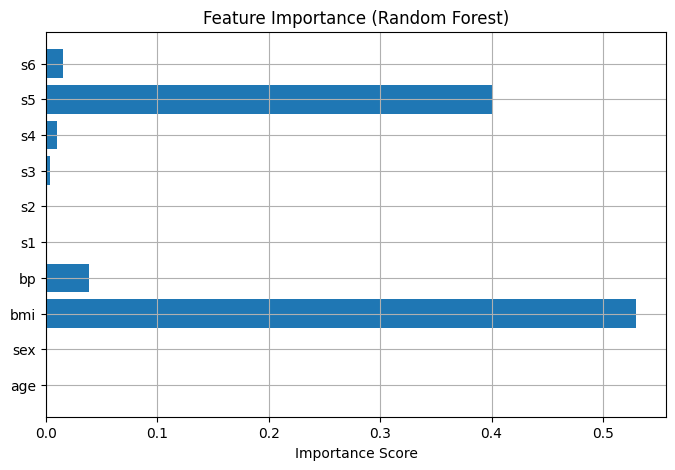

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = rf.feature_importances_
features = x_train.columns

# Plot
plt.figure(figsize=(8, 5))
plt.barh(features, feature_importance)
plt.xlabel("Importance Score")
plt.title("Feature Importance (Random Forest)")
plt.grid(True)
plt.show()


###Cross-Validation


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("Cross-Validated R2:", scores)
print("Mean R2:", scores.mean())


Cross-Validated R2: [0.37598185 0.48438923 0.44927174 0.28888663 0.44634976]
Mean R2: 0.4089758430275944


###Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 5, 10],
    'n_estimators': [50, 100, 200]
}

grid = GridSearchCV(rf, param_grid, cv=3, scoring='r2')
grid.fit(x_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Params: {'max_depth': 5, 'n_estimators': 100}
Best Score: 0.43650562979706814


###Residual/Error Analysis
See where your model is doing poorly:




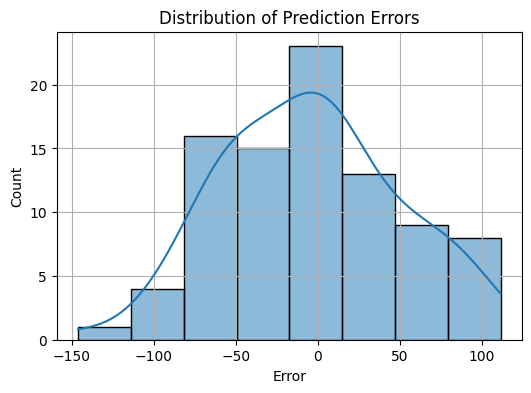

In [ ]:
import seaborn as sns

residuals = y_test - y_rf_test_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error")
plt.ylabel("Count")
plt.grid(True)
plt.show()

###compare multiple models


In [ ]:
results_df = pd.DataFrame([
    ['Linear Regression', lr_train_r2, lr_test_r2],
    ['Random Forest', rf_train_r2, rf_test_r2],
    # Add more here
], columns=['Model', 'Train R2', 'Test R2'])

print(results_df)


               Model  Train R2   Test R2
0  Linear Regression  0.527919  0.452603
1      Random Forest  0.504956  0.450215


###Model Explainability
here SHAP is used  to explain predictions:

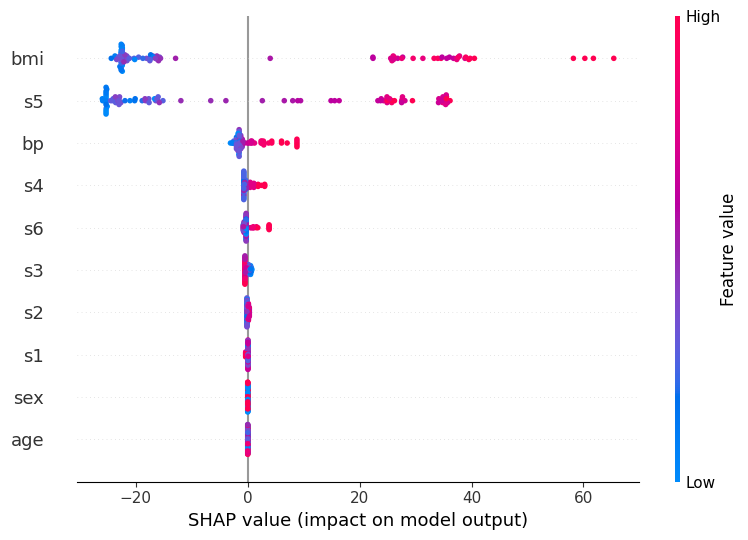

In [ ]:
import shap

explainer = shap.Explainer(rf, x_test)
shap_values = explainer(x_test)

shap.summary_plot(shap_values, x_test)


In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.4 MB/s eta 0:00:00


Deploy with Streamlit
here users enter values and get predictions:

In [ ]:

# save as app.py
import streamlit as st
import pickle

model = pickle.load(open('rf_model.pkl', 'rb'))

st.title("Predictor App")

# Example input
feature1 = st.number_input("Feature 1")
feature2 = st.number_input("Feature 2")
# ...

if st.button("Predict"):
    result = model.predict([[feature1, feature2]])
    st.success(f"Prediction: {result[0]}")


FileNotFoundError: [Errno 2] No such file or directory: 'rf_model.pkl'

In [ ]:
!pip install streamlit

In [ ]:
import pickle

# After training your model
pickle.dump(rf, open("rf_model.pkl", "wb"))


In [ ]:
import streamlit as st
import pickle

# Load saved model
model = pickle.load(open('rf_model.pkl', 'rb'))

st.title("Predictor App")

# Example inputs — replace with actual feature names & count
feature1 = st.number_input("Feature 1")
feature2 = st.number_input("Feature 2")
# Add more if needed

if st.button("Predict"):
    result = model.predict([[feature1, feature2]])  # match order of features
    st.success(f"Prediction: {result[0]}")


2025-07-08 04:53:23.920 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 04:53:23.922 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 04:53:23.923 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 04:53:23.924 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 04:53:23.925 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 04:53:23.926 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 04:53:23.927 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 04:53:23.928 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
# to save any model
pickle.dump(lr, open("lr_model.pkl", "wb"))

In [ ]:
# save as app.py
import streamlit as st
import pickle

model = pickle.load(open('rf_model.pkl', 'rb'))

st.title("Predictor App")

# Example input
feature1 = st.number_input("Feature 1")
feature2 = st.number_input("Feature 2")
# ...

if st.button("Predict"):
    result = model.predict([[feature1, feature2]])
    st.success(f"Prediction: {result[0]}")


2025-07-08 04:53:23.961 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 04:53:23.964 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 04:53:23.965 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 04:53:23.966 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 04:53:23.967 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 04:53:23.968 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 04:53:23.969 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 04:53:23.970 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

### 2nd prediction model


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

# Load the dataset
df = pd.read_csv("/content/mock_fish_catch_dataset_10000.csv")

# Date features
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday
df.drop(columns=['Date'], inplace=True)

# Add Catch Type
pelagic = ['Tuna', 'Pomfret', 'Anchovy', 'Sardine', 'Mackerel', 'Seer Fish']
df['Catch_Type'] = df['Fish_Species'].apply(lambda x: 'Pelagic' if x in pelagic else 'Demersal')

# Encode categorical variables
for col in ['Tide', 'Moon_Phase', 'Fish_Species', 'Catch_Type']:
    df[col] = LabelEncoder().fit_transform(df[col])

# Define Inputs & Outputs
X = df.drop(columns=['Catch_kg', 'Fish_Species', 'Catch_Type'])
y_reg = df['Catch_kg']
y_species = df['Fish_Species']
y_type = df['Catch_Type']

# Split
x_train, x_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2)
_, _, y_train_species, y_test_species = train_test_split(X, y_species, test_size=0.2)
_, _, y_train_type, y_test_type = train_test_split(X, y_type, test_size=0.2)

# Train Models
reg_model = RandomForestRegressor().fit(x_train, y_train_reg)
species_model = RandomForestClassifier().fit(x_train, y_train_species)
type_model = RandomForestClassifier().fit(x_train, y_train_type)

# Evaluate
print("Regression R²:", r2_score(y_test_reg, reg_model.predict(x_test)))
print("Regression MSE:", mean_squared_error(y_test_reg, reg_model.predict(x_test)))
print("Species Accuracy:", accuracy_score(y_test_species, species_model.predict(x_test)))
print("Type Accuracy:", accuracy_score(y_test_type, type_model.predict(x_test)))


Regression R²: -0.03456717068503101
Regression MSE: 1846.0654334025
Species Accuracy: 0.1665
Type Accuracy: 1.0


In [ ]:
def predict_fish_catch_and_type(depth, latitude, longitude, sst=28.0, salinity=34.5, chlorophyll=0.5):
    """
    Predicts the fish catch (kg) and fish species based on input features.
    You can pass SST, salinity, and chlorophyll or leave them as defaults.
    """
    # Use average values for non-user inputs (from x_train)
    dummy_day = x_train['Day'].mean()
    dummy_month = x_train['Month'].mean()
    dummy_weekday = x_train['Weekday'].mean()
    dummy_tide = x_train['Tide'].mean()
    dummy_moon_phase = x_train['Moon_Phase'].mean()

    # Prepare input with correct feature names
    input_data = pd.DataFrame({
        'Latitude': [latitude],
        'Longitude': [longitude],
        'Depth_m': [depth],
        'SST_C': [sst],
        'Salinity_PSU': [salinity],
        'Chlorophyll_mg_m3': [chlorophyll],
        'Tide': [dummy_tide],
        'Moon_Phase': [dummy_moon_phase],
        'Day': [dummy_day],
        'Month': [dummy_month],
        'Weekday': [dummy_weekday]
    })

    # Predict values
    predicted_catch_kg = reg_model.predict(input_data)[0]
    predicted_species_encoded = species_model.predict(input_data)[0]
    predicted_species = species_mapping.get(predicted_species_encoded, "Unknown")

    return predicted_catch_kg, predicted_species


In [ ]:
def predict_fish_catch_and_type(depth, latitude, longitude, sst=28.0, salinity=34.5, chlorophyll=0.5):
    """
    Predicts the fish catch (kg) and fish species based on input features.
    You can pass SST, salinity, and chlorophyll or leave them as defaults.
    """
    # Use average values for non-user inputs (from x_train)
    dummy_day = x_train['Day'].mean()
    dummy_month = x_train['Month'].mean()
    dummy_weekday = x_train['Weekday'].mean()
    dummy_tide = x_train['Tide'].mean()
    dummy_moon_phase = x_train['Moon_Phase'].mean()

    # Prepare input with correct feature names
    input_data = pd.DataFrame({
        'Latitude': [latitude],
        'Longitude': [longitude],
        'Depth_m': [depth],
        'SST_C': [sst],
        'Salinity_PSU': [salinity],
        'Chlorophyll_mg_m3': [chlorophyll],
        'Tide': [dummy_tide],
        'Moon_Phase': [dummy_moon_phase],
        'Day': [dummy_day],
        'Month': [dummy_month],
        'Weekday': [dummy_weekday]
    })

    # Predict values
    predicted_catch_kg = reg_model.predict(input_data)[0]
    predicted_species_encoded = species_model.predict(input_data)[0]
    predicted_species = species_mapping.get(predicted_species_encoded, "Unknown")

    return predicted_catch_kg, predicted_species

predicted_catch, predicted_species = predict_fish_catch_and_type(
    depth=45.0,
    latitude=11.5,
    longitude=79.1,
    sst=27.8,
    salinity=35.0,
    chlorophyll=0.6
)

print(f"Predicted Catch (kg): {predicted_catch:.2f}")
print(f"Predicted Fish Species: {predicted_species}")



NameError: name 'species_mapping' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sample_inputs = pd.DataFrame({
    'Latitude': [10.0, 12.0, 11.0, 13.0],
    'Longitude': [78.0, 80.0, 79.5, 77.5],
    'Depth_m': [50.0, 40.0, 48.0, 55.0],
    'SST_C': [28.0, 27.5, 28.1, 27.0],
    'Salinity_PSU': [34.8, 35.1, 34.9, 35.2],
    'Chlorophyll_mg_m3': [0.5, 0.6, 0.45, 0.55],
    'Tide': [x_train['Tide'].mean()] * len([10.0, 12.0, 11.0, 13.0]),
    'Moon_Phase': [x_train['Moon_Phase'].mean()] * len([10.0, 12.0, 11.0, 13.0]),
    'Day': [x_train['Day'].mean()] * len([10.0, 12.0, 11.0, 13.0]),
    'Month': [x_train['Month'].mean()] * len([10.0, 12.0, 11.0, 13.0]),
    'Weekday': [x_train['Weekday'].mean()] * len([10.0, 12.0, 11.0, 13.0])
})

# Predict for the sample inputs
predicted_catches = reg_model.predict(sample_inputs)
predicted_species_encoded = species_model.predict(sample_inputs)


# Recreate the species mapping from the original data
species_encoder = LabelEncoder().fit(pd.read_csv("/mock_fish_catch_dataset_10000.csv")['Fish_Species'])
species_mapping = {i: species for i, species in enumerate(species_encoder.classes_)}

predicted_species = [species_mapping.get(encoded_species, "Unknown") for encoded_species in predicted_species_encoded]

# Combine inputs and predictions for plotting
plot_df = sample_inputs.copy()
plot_df['Predicted_Catch_kg'] = predicted_catches
plot_df['Predicted_Fish_Species'] = predicted_species

# --- Graphical Representation ---

# Scatter plot of Predicted Catch vs Latitude/Longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='Longitude', y='Latitude', size='Predicted_Catch_kg', hue='Predicted_Catch_kg', sizes=(50, 1000), palette='viridis')
plt.title('Predicted Fish Catch (kg) by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Predicted Catch (kg)')
plt.grid(True)
plt.show()

# Bar plot of predicted species distribution (if you have enough samples to see variation)
plt.figure(figsize=(10, 6))
sns.countplot(data=plot_df, y='Predicted_Fish_Species', order=plot_df['Predicted_Fish_Species'].value_counts().index, palette='viridis')
plt.title('Distribution of Predicted Fish Species for Sample Inputs')
plt.xlabel('Count')
plt.ylabel('Predicted Fish Species')
plt.grid(axis='x')
plt.show()

# Scatter plot of Predicted Catch vs Depth
plt.figure(figsize=(8, 5))
sns.scatterplot(data=plot_df, x='Depth_m', y='Predicted_Catch_kg', hue='Predicted_Fish_Species', palette='viridis', s=100)
plt.title('Predicted Fish Catch vs Depth')
plt.xlabel('Depth (m)')
plt.ylabel('Predicted Catch (kg)')
plt.grid(True)
plt.show()



### SAVING IT TO BACKENED
## save the training model and scalar asa pickle file


In [ ]:
import pickle

# Save the regression model
with open("regression_model.pkl", "wb") as reg_file:
    pickle.dump(reg_model, reg_file)

# Save the species classification model
with open("species_model.pkl", "wb") as species_file:
    pickle.dump(species_model, species_file)


with open("species_mapping.pkl", "wb") as map_file:
    pickle.dump(species_mapping, map_file)

print("All models and mappings saved successfully.")




In [ ]:
model = ...
reg_model = ...
reg_file = ...
fish_model = ...
species_model = ...
species_mapping = ...

## code for prediction


In [ ]:


# Load saved models and mapping

# save as app.py
import streamlit as st
import pickle

model = pickle.load(open('rf_model.pkl', 'rb'))

st.title("Predictor App")

# Example input
feature1 = st.number_input("Feature 1")
feature2 = st.number_input("Feature 2")
# ...

if st.button("Predict"):
    result = model.predict([[feature1, feature2]])
    st.success(f"Prediction: {result[0]}")


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("/content/mock_fish_catch_dataset_10000.csv")

#
print("\n--- Sample Data Preview ---")
print(df.head())

print("\n--- Data Info ---")
df.info()

print("\n--- Descriptive Statistics ---")
print(df.describe())

print("\n--- Value Counts for Categorical Columns (after encoding) ---")
for col in ['Tide', 'Moon_Phase', 'Fish_Species', 'Catch_Type']:
    if col in df.columns:
        print(f"\n{col}:\n{df[col].value_counts()}")

# Display the mapping from encoded numerical species back to original species names
print("\n--- Fish Species Encoding Mapping ---")
if 'species_encoder' in globals():
    species_mapping = {i: species for i, species in enumerate(species_encoder.classes_)}
    print(species_mapping)
elif 'species_mapping' in globals() and species_mapping is not None:
     # If species_encoder was not found, use the loaded species_mapping
     print(species_mapping)
else:
    print("Species encoding mapping not available.")

print("\n--- Distribution of Catch (kg) ---")
plt.figure(figsize=(8, 5))
sns.histplot(df['Catch_kg'], kde=True)
plt.title('Distribution of Fish Catch (kg)')
plt.xlabel('Catch (kg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("\n--- Correlation Matrix ---")
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("/mock_fish_catch_dataset_10000.csv")

#
print("\n--- Sample Data Preview ---")
print(df.head())

print("\n--- Data Info ---")
df.info()

print("\n--- Descriptive Statistics ---")
print(df.describe())

print("\n--- Value Counts for Categorical Columns (after encoding) ---")
for col in ['Tide', 'Moon_Phase', 'Fish_Species', 'Catch_Type']:
    if col in df.columns:
        print(f"\n{col}:\n{df[col].value_counts()}")

# Display the mapping from encoded numerical species back to original species names
print("\n--- Fish Species Encoding Mapping ---")
if 'species_encoder' in globals():
    species_mapping = {i: species for i, species in enumerate(species_encoder.classes_)}
    print(species_mapping)
elif 'species_mapping' in globals() and species_mapping is not None:
     # If species_encoder was not found, use the loaded species_mapping
     print(species_mapping)
else:
    print("Species encoding mapping not available.")


# Load the dataset
df = pd.read_csv("/mock_fish_catch_dataset_10000.csv")
new_latitude = 11.8
new_longitude = 79.3
new_depth = 40.0
new_sst = 27.9
new_salinity = 35.1
new_chlorophyll = 0.55

predicted_catch, predicted_species = make_prediction(
    latitude=new_latitude,
    longitude=new_longitude,
    depth=new_depth,
    sst=new_sst,
    salinity=new_salinity,
    chlorophyll=new_chlorophyll
)

if predicted_catch is not None:
    print("\n--- New Prediction ---")
    print(f"Predicted Catch (kg): {predicted_catch:.2f}")
    print(f"Predicted Fish Species: {predicted_species}")


--- Sample Data Preview ---
   Latitude  Longitude        Date  Depth_m  SST_C  Salinity_PSU  \
0   10.1944    78.1143  2024-07-04       30  30.92         33.12   
1   10.2110    79.4342  2023-10-20       30  26.83         33.88   
2    9.8066    77.7829  2024-08-22       70  28.73         34.18   
3    9.7816    78.0048  2024-04-10        5  27.25         35.08   
4    9.1235    78.4074  2024-06-20       70  27.92         35.37   

   Chlorophyll_mg_m3  Tide Moon_Phase Fish_Species  Catch_kg  
0               0.84  High  Full Moon         Tuna      68.7  
1               1.85  High     Waxing      Pomfret      70.5  
2               0.71  High  Full Moon      Anchovy      90.6  
3               1.82  High   New Moon      Sardine      21.6  
4               1.07  High     Waxing    Seer Fish      60.2  

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ----

NameError: name 'make_prediction' is not defined